In [1]:
#IMPORTUJEMY BIBLIOTEKI

#Pandas - is a software library written for the Python programming language for data manipulation and analysis.
#Matplotlib - A charting library for the Python programming language and its NumPy numeric extension.
#Openpyxl - library library of xlsx / xlsm / xltx / xltm files and their writing

import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook

In [2]:
#LOADING DATA AND DECLARATION OF VARIABLES
confirmed = pd.read_csv('confirmed.csv')
deaths = pd.read_csv('deaths.csv')
cured = pd.read_csv('recovered.csv')

#I THROW OUT MY NAMES FROM THE DOCUMENT (PROVINCE, VOIVODESHIP, ETC.)
confirmed = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
cured = cured.drop(['Province/State', 'Lat', 'Long'], axis=1)

#GROUPS DATA ACCORDING TO. COUNTRIES
confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
cured = cured.groupby(cured['Country/Region']).aggregate('sum')

#TRANSPOSITION - SWITCHING DATE PLACES WITH COUNTRIES
confirmed = confirmed.T
deaths = deaths.T
cured = cured.T

# print(deaths)

In [3]:
#WE LOOK FOR GROWTH: INFECTED, DEATH, Cured
n_cases = confirmed.copy()

#For each day (line) in the "confirmed" file, we search for new cases
for day in range(1, len(confirmed)):
    n_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]
print(n_cases.tail(10)) #Ostatnie 10

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
10/9/22                 170       22        6        0       0           0   
10/10/22                 97        9        6        0       0           0   
10/11/22                157       31        3        0       0           0   
10/12/22                103       21        6       91       0           0   
10/13/22                117       24        0        0       0           0   
10/14/22                168       19       12        0       0           0   
10/15/22                 82       21        0        0       0           0   
10/16/22                116       19        6        0       0           0   
10/17/22                 64        7       17        0       0           0   
10/18/22                227       28        9        0       0           0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
10/9/22                           0       2239        0       1039

In [4]:
#WE CHECK THE PERCENTAGE INCREASE OF DISEASES COMPARED TO THE PREVIOUS DAY
ind_increase = confirmed.copy()
for day in range(1, len(confirmed)):
    ind_increase.iloc[day] = (ind_increase.iloc[day] / confirmed.iloc[day-1]) * 100
# print(n_cases.tail(10)) #Last 10

In [5]:
#WE CHECK THE NUMBER OF ACTIVE SICK
a_cases = confirmed.copy()
for day in range (0, len(confirmed)):
    a_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - cured.iloc[day]
# print(n_cases.tail(10)) #Ostatnie 10

In [6]:
a_cases = confirmed.copy()
for day in range (0, len(confirmed)):
    a_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - cured.iloc[day]
# print(n_cases.tail(10)) #Ostatnie 10

In [7]:
#PERCENTAGE INCREASE FROM DAY TO DAY
p_increase = confirmed.copy()
for day in range(1, len(confirmed)):
    p_increase.iloc[day] = ((a_cases.iloc[day] - a_cases.iloc[day-1]) / a_cases.iloc[day - 1]) * 100
# print(n_cases.tail(10)) #Ostatnie 10

In [19]:
#PERCENTAGE RATE OF DEATH
deaths_ind = confirmed.copy()

for day in range(0, len(confirmed)):
    deaths_ind.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100
# print(n_cases.tail(10)) #Ostatnie 10

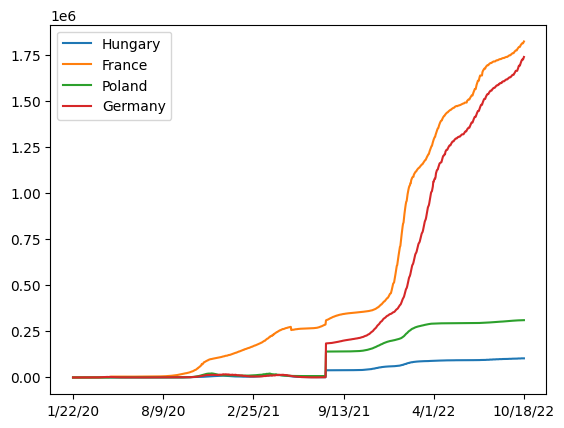

In [9]:
#PERCENTAGE OF SICK WHO NEED HOSPITALIZATION
#According to of an article on the Internet, it should be 5%
hospitalized_rate = 0.05

#WE WILL CHECK HOW MANY DAY HOSPITALIZATION IS REQUIRED
need_hospitalization = confirmed.copy()
for day in range(0, len(confirmed)):
    need_hospitalization.iloc[day] = a_cases.iloc[day] * hospitalized_rate

countries = ['Hungary', 'France', 'Poland', 'Germany']

for country in countries:
    need_hospitalization[country].plot(label=country)
plt.legend(loc = 'upper left')
plt.show()

In [10]:
#CALCULATION OF INFECTIONS (and others) AND SORTING THEIR VALUES FROM THE HIGHEST
from tkinter import N
from numpy import sort

sort_infected = n_cases.copy()
sort_infected = pd.DataFrame.sum(sort_infected)

# sort_infected_d = sort_infected.sort_values(ascending=False) #Descending sort
sort_infected_a = sort_infected.sort_values(ascending=False) #Ascending sort

# print(sort_infected_d)

print(sort_infected_a)

Country/Region
US              97023298
India           44634376
France          36573007
Germany         34888963
Brazil          34746462
                  ...   
Holy See              29
Tuvalu                20
Antarctica            11
MS Zaandam             9
Korea, North           1
Length: 201, dtype: int64


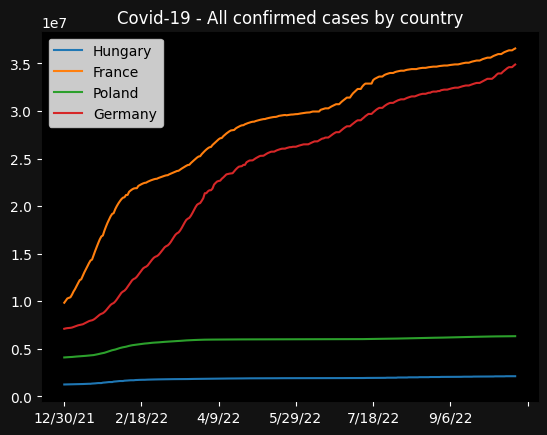

In [11]:
#WE DISPLAY A CHART SHOWING THE TOTAL NUMBER OF INFECTED PERSONS ACCORDING TO. COUNTRIES
ax = plt.subplot()

#WE SET THE CHART PROPERTIES
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors = 'white')
ax.tick_params(axis='y', colors = 'white')
ax.set_title('Covid-19 - All confirmed cases by country', color = 'white')

#THIS YEAR GIVES AN EXAMPLE, BECAUSE OF THE LARGE AMOUNT OF DATA
for country in countries:
    confirmed[country][708:].plot(label=country)

plt.legend(loc = 'upper left')
plt.show()

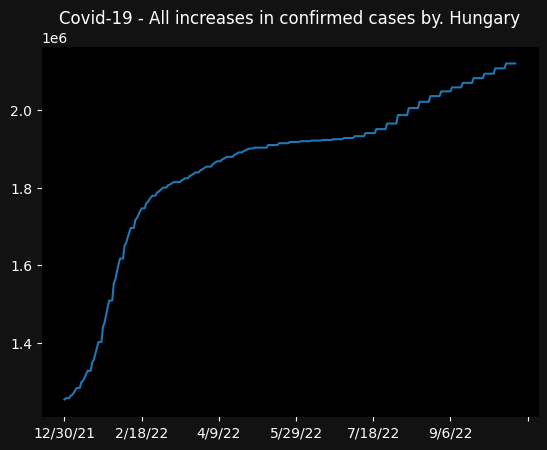

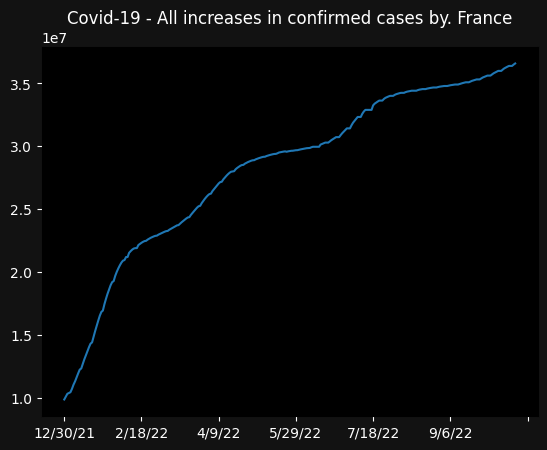

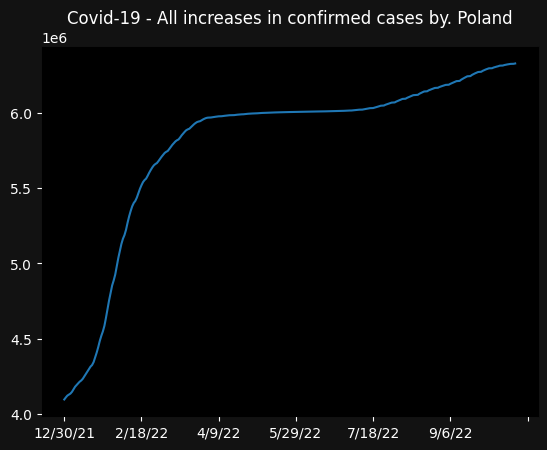

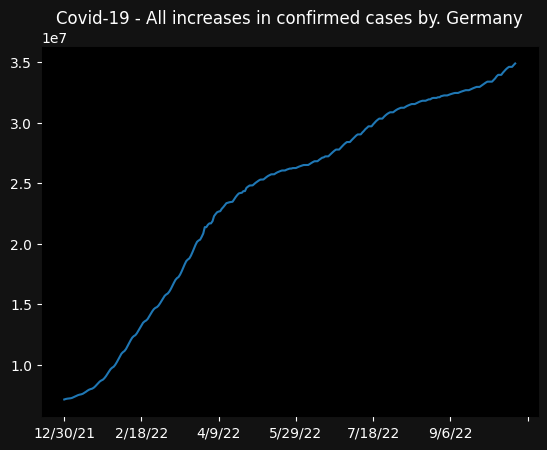

In [12]:
#WHAT IS MENTIONED ABOVE, ONLY IN SEPARATE CHARTS
for country in countries: 
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors = 'white')
    ax.tick_params(axis='y', colors = 'white')
    ax.set_title(f'Covid-19 - All increases in confirmed cases by. {country}', color = 'white')
    confirmed[country][708:].plot(label=country)
    plt.show()

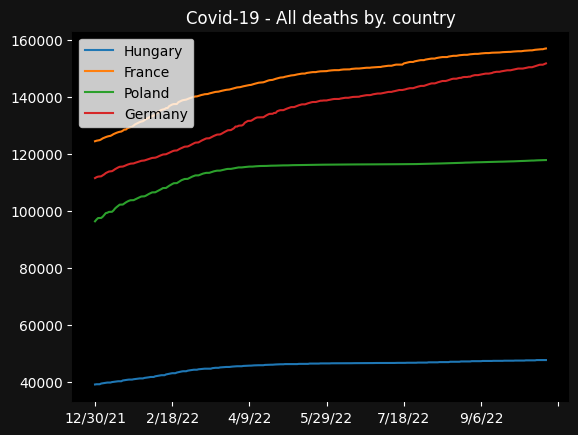

In [17]:
#NUMBER OF PEOPLE THAT DIE OF COVID-19
ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors = 'white')
ax.tick_params(axis='y', colors = 'white')
ax.set_title(f'Covid-19 - All deaths by. country', color = 'white')

for country in countries:
    deaths[country][708:].plot(label=country)

plt.legend(loc = 'upper left')
plt.show()

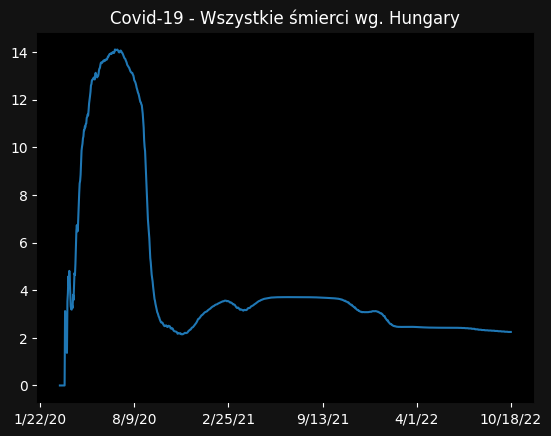

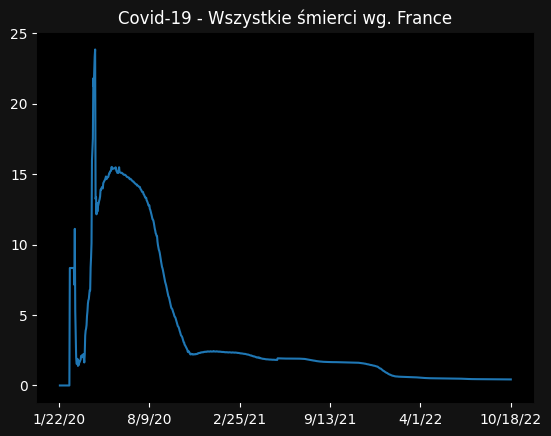

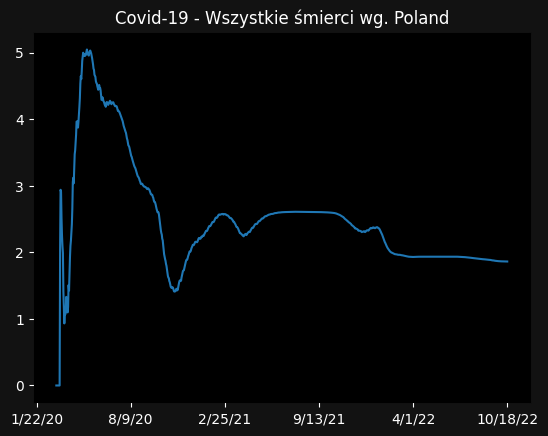

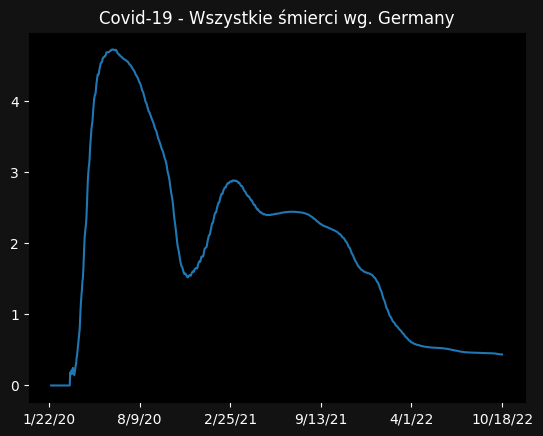

In [20]:
#PERCENTAGE OF PEOPLE WHO DIE IN RELATION TO LIVE + SICK PEOPLE
for country in countries: 
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors = 'white')
    ax.tick_params(axis='y', colors = 'white')
    ax.set_title(f'Covid-19 - Wszystkie śmierci wg. {country}', color = 'white')
    deaths_ind[country].plot(label=country)
    plt.show()

C:\Users\witek\AppData\Local\Temp\ipykernel_4168\2160036478.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  simulated = simulated.append(pd.DataFrame(index = dates))


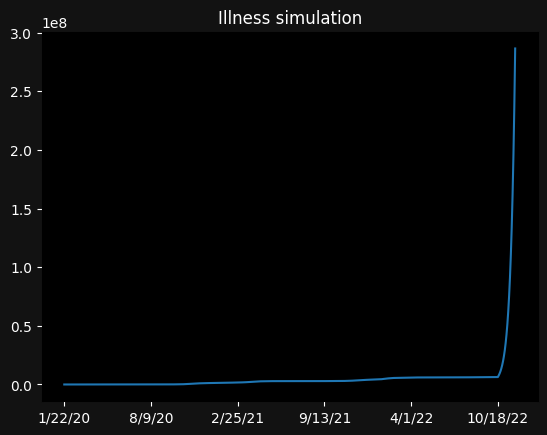

In [21]:
#EXPERIMENT:
# Suppose there are 10% more cases of sick people per day, compared to the number of sick people on the day before

#Explanation:
# If there are 320 people on 10/15/2020
# That will be 352 people on 11/15/2020. And so on

sim_increase_num_sick = 0.1

dates = pd.date_range(start='10/15/2020', periods = 40, freq = "D")
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%y')

simulated = confirmed.copy()
simulated = simulated.append(pd.DataFrame(index = dates))

for day in range(len(confirmed), len(confirmed)+40):
    simulated.iloc[day] = simulated.iloc[day-1] * (1 + sim_increase_num_sick)

ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors = 'white')
ax.tick_params(axis='y', colors = 'white')
ax.set_title(f'Illness simulation', color = 'white')
simulated['Poland'].plot()
plt.show()

# print(simulated)

In [106]:
#WRITE TO FILE
# data = pd.DataFrame(a_cases)
# data = pd.DataFrame(p_increase)

data = pd.DataFrame(simulated)

data.to_excel("output_simulation.xlsx")